In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection #import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics  # mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, r2_score
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.metrics import max_error
from sklearn.decomposition import PCA
from sklearn import preprocessing
import statsmodels.api as sm

In [2]:
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')

In [3]:
# train_df['Class'] = train_df['Cycle'].apply(lambda x:0 if x>= 30 else 1 )

In [4]:
train_df['Class_50'] = train_df['Cycle'].apply(lambda x: 0 if x>= 50 else 1 )
train_df['Class_70'] = train_df['Cycle'].apply(lambda x: 0 if x>= 70 else 1)
train_df['Class_100'] = train_df['Cycle'].apply(lambda x: 0 if x>= 100 else 1)
train_df['Class_150'] = train_df['Cycle'].apply(lambda x: 0 if x>= 150 else 1)
train_df

,Unit,Cycle,Setting1,Setting2,LPC °R2,HPC °R3,LPT °R4,Bypass-duct psia6,HPC psia7,Fan rpm8,...,Corrected core rpm14,Bypass ratio15,BE17,HPT coolant bleed lbm/s20,LPT coolant bleed lbm/s21,RUL,Class_50,Class_70,Class_100,Class_150
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,...,8138.62,8.4195,392,39.06,23.4190,191,1,1,1,1
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,...,8131.49,8.4318,392,39.00,23.4236,190,1,1,1,1
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,...,8133.23,8.4178,390,38.95,23.3442,189,1,1,1,1
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,...,8133.83,8.3682,392,38.88,23.3739,188,1,1,1,1
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,...,8133.80,8.4294,393,38.90,23.4044,187,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,...,8137.60,8.4956,397,38.49,22.9735,4,0,0,0,0
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,...,8136.50,8.5139,395,38.30,23.1594,3,0,0,0,0
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,...,8141.05,8.5646,398,38.44,22.9333,2,0,0,0,0
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,...,8139.29,8.5389,395,38.29,23.0640,1,0,0,0,0


In [5]:
# train_df.Class.value_counts()

In [6]:
test_df['Class_50'] = test_df['Cycle'].apply(lambda x: 0 if x>= 50 else 1)
test_df['Class_70'] = test_df['Cycle'].apply(lambda x: 0 if x>= 70 else 1)
test_df['Class_100'] = test_df['Cycle'].apply(lambda x: 0 if x>= 100 else 1)
test_df['Class_150'] = test_df['Cycle'].apply(lambda x: 0 if x>= 150 else 1)
test_df

,Unit,Cycle,Setting1,Setting2,LPC °R2,HPC °R3,LPT °R4,Bypass-duct psia6,HPC psia7,Fan rpm8,...,Corrected core rpm14,Bypass ratio15,BE17,HPT coolant bleed lbm/s20,LPT coolant bleed lbm/s21,RUL,Class_50,Class_70,Class_100,Class_150
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,...,8125.55,8.4052,392,38.86,23.3735,142,1,1,1,1
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,...,8139.62,8.3803,393,39.02,23.3916,141,1,1,1,1
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,...,8130.10,8.4441,393,39.08,23.4166,140,1,1,1,1
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,...,8132.90,8.3917,391,39.00,23.3737,139,1,1,1,1
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,...,8129.54,8.4031,390,38.99,23.4130,138,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,21.61,553.41,2388.02,...,8213.28,8.4715,394,38.65,23.1974,24,0,0,0,0
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,21.61,553.22,2388.05,...,8210.85,8.4512,395,38.57,23.2771,23,0,0,0,0
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,21.61,553.04,2388.11,...,8217.24,8.4569,395,38.62,23.2051,22,0,0,0,0
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,21.61,553.37,2388.07,...,8220.48,8.4711,395,38.66,23.2699,21,0,0,0,0


In [7]:
test_df.columns

Index(['Unit', 'Cycle', 'Setting1', 'Setting2', 'LPC °R2', 'HPC °R3',
       'LPT °R4', 'Bypass-duct psia6', 'HPC psia7', 'Fan rpm8', 'Core rpm9',
       'Hpc psia11', 'Ratio of fuel12', 'Corrected fan rpm13',
       'Corrected core rpm14', 'Bypass ratio15', 'BE17',
       'HPT coolant bleed lbm/s20', 'LPT coolant bleed lbm/s21', 'RUL',
       'Class_50', 'Class_70', 'Class_100', 'Class_150'],
      dtype='object')

In [8]:
x_variables = ['Cycle','Setting1', 'Setting2','LPT °R4','Core rpm9',
       'Hpc psia11', 'Ratio of fuel12','Corrected core rpm14']

# x_variables =['Cycle', 'Setting1', 'Setting2', 'LPC °R2', 'HPC °R3',
#        'LPT °R4', 'Bypass-duct psia6', 'HPC psia7', 'Fan rpm8', 'Core rpm9',
#        'Hpc psia11', 'Ratio of fuel12', 'Corrected fan rpm13',
#        'Corrected core rpm14', 'Bypass ratio15', 'BE17',
#        'HPT coolant bleed lbm/s20', 'LPT coolant bleed lbm/s21']

X_train = train_df[x_variables]
y_train = train_df['RUL']
X_test = test_df[x_variables]
y_test = test_df['RUL']

Text(0.5, 1.0, 'Test - Train')

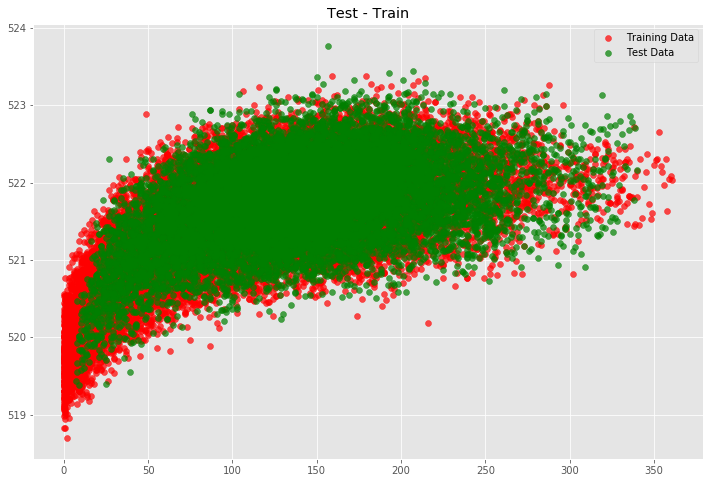

In [9]:
plt.figure(figsize = (12,8))
plt.scatter(y_train,X_train['Ratio of fuel12'],label = 'Training Data',color = 'r', alpha = 0.7)
plt.scatter(y_test,X_test['Ratio of fuel12'],label = 'Test Data',color ='g', alpha = 0.7)
plt.legend()
plt.title('Test - Train')

In [10]:
# Create linear model and train it
LR = linear_model.LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

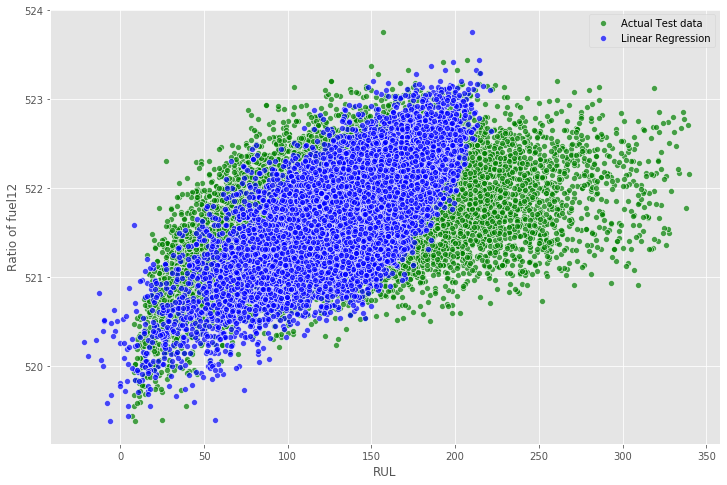

In [11]:
#use the model to predict on test data
y_test_prediction = LR.predict(X_test)
y_train_prediction = LR.predict(X_train)

#plot prediction line against actual test data
plt.figure(figsize = (12,8))
sns.scatterplot(y_test, X_test['Ratio of fuel12'], label = 'Actual Test data', color = 'g', alpha = 0.7)
sns.scatterplot(y_test_prediction, X_test['Ratio of fuel12'], label = 'Linear Regression', color = 'b',alpha = 0.7)

plt.legend()
plt.show()

In [12]:
print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_prediction)), 
      (metrics.r2_score(y_test, y_test_prediction))))

R^2 training: 0.649, R^2 test: 0.467


In [13]:
# x = sm.add_constant(x_train)
# model = sm.OLS(y_train,x)
# result = model.fit()
# print(result.summary())

In [14]:
#try Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_test_prediction = polyreg.predict(X_test_poly)
y_train_prediction = polyreg.predict(X_train_poly)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_prediction)), 
      (metrics.r2_score(y_test, y_test_prediction))))

R^2 training: 0.712, R^2 test: 0.518


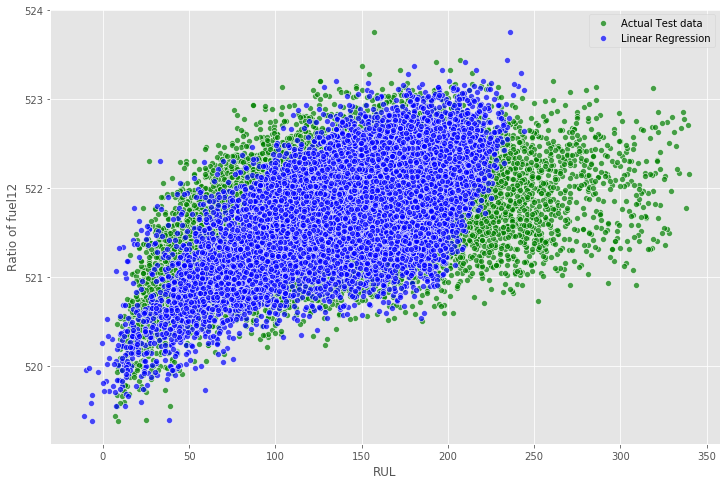

In [15]:
#plot prediction line against actual test data
plt.figure(figsize = (12,8))
sns.scatterplot(y_test, X_test['Ratio of fuel12'], label = 'Actual Test data', color = 'g', alpha = 0.7)
sns.scatterplot(y_test_prediction, X_test['Ratio of fuel12'], label = 'Linear Regression', color = 'b',alpha = 0.7)
# sns.scatterplot(y_test, X_test['Ratio of fuel12'], label = 'Actual Test data', color = 'g', alpha = 0.7)
plt.legend()
plt.show()

R^2 training: 0.719, R^2 test: 0.520


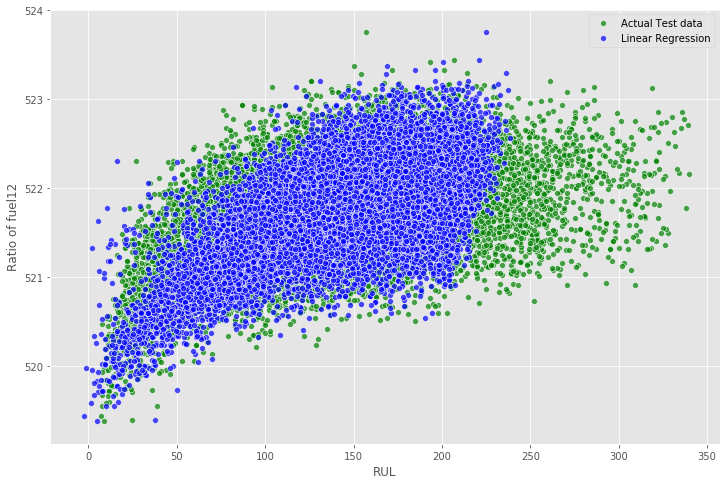

In [16]:
#try Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_test_prediction = polyreg.predict(X_test_poly)
y_train_prediction = polyreg.predict(X_train_poly)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_prediction)), 
      (metrics.r2_score(y_test, y_test_prediction))))

#plot prediction line against actual test data
plt.figure(figsize = (12,8))
sns.scatterplot(y_test, X_test['Ratio of fuel12'], label = 'Actual Test data', color = 'g', alpha = 0.7)
sns.scatterplot(y_test_prediction, X_test['Ratio of fuel12'], label = 'Linear Regression', color = 'b',alpha = 0.7)
# sns.scatterplot(y_test, X_test['Ratio of fuel12'], label = 'Actual Test data', color = 'g', alpha = 0.7)
plt.legend()
plt.show()

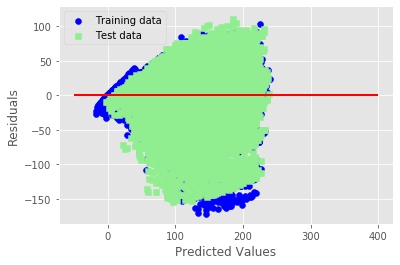

In [17]:
plt.scatter(y_train_prediction, y_train_prediction - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_prediction, y_test_prediction - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
# plt.title(model + ' Residuals')
plt.show()

## Random Forest
### Predict if the engine will fail within certain time frame(eg, days/ cycles)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [9]:
# 50 cycles before breakdown 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train_real50 = train_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1)
y_train_real50 = train_df['Class_50']
X_test_real50 = test_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1)
y_test_real50 = test_df['Class_50']
rf = RandomForestClassifier(n_estimators=100,max_depth=1,min_samples_leaf =100)
rf.fit(X_train_real50, y_train_real50)
y_pred50 = rf.predict(X_test_real50)
print('Training score:',rf.score(X_train_real50,y_train_real50))
print('Testing score:',rf.score(X_test_real50,y_test_real50))
print("testing data Accuracy:",metrics.accuracy_score(y_test_real50, y_pred50))

Training score: 0.7624933352721632
Testing score: 0.630345143555284
testing data Accuracy: 0.630345143555284


In [67]:
# 70 cycles before breakdown 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train_real70 = train_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1)
y_train_real70 = train_df['Class_70']
X_test_real70 = test_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1)
y_test_real70 = test_df['Class_70']
rf = RandomForestClassifier(n_estimators=100,max_depth=1,min_samples_leaf = 350)
rf.fit(X_train_real70, y_train_real70)
y_pred70 = rf.predict(X_test_real70)
print('Training score:',rf.score(X_train_real70,y_train_real70))
print('Testing score:',rf.score(X_test_real70,y_test_real70))
print("testing data Accuracy:",metrics.accuracy_score(y_test_real70, y_pred70))

Training score: 0.9563763268867239
Testing score: 0.9544135613927917
testing data Accuracy: 0.9544135613927917


In [63]:
# 100 cycles before breakdown 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train_real100 = train_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1)
y_train_real100 = train_df['Class_100']
X_test_real100 = test_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1)
y_test_real100 = test_df['Class_100']
rf = RandomForestClassifier(n_estimators=100,max_depth=1,min_samples_leaf = 100)
rf.fit(X_train_real100, y_train_real100)
y_pred100 = rf.predict(X_test_real100)
print('Training score:',rf.score(X_train_real100,y_train_real100))
print('Testing score:',rf.score(X_test_real100,y_test_real100))
print("testing data Accuracy:",metrics.accuracy_score(y_test_real100, y_pred100))

Training score: 0.994474334738985
Testing score: 0.9961056811240073
testing data Accuracy: 0.9961056811240073


In [65]:
# 150 cycles before breakdown 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train_real150 = train_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1)
y_train_real150 = train_df['Class_150']
X_test_real150 = test_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1)
y_test_real150 = test_df['Class_150']
rf = RandomForestClassifier(n_estimators=100,max_depth=1,min_samples_leaf = 150)
rf.fit(X_train_real150, y_train_real150)
y_pred150 = rf.predict(X_test_real150)
print('Training score:',rf.score(X_train_real150,y_train_real150))
print('Testing score:',rf.score(X_test_real150,y_test_real150))
print("testing data Accuracy:",metrics.accuracy_score(y_test_real150, y_pred150))

Training score: 0.8766904173331395
Testing score: 0.928069639584606
testing data Accuracy: 0.928069639584606


In [10]:
feature_imp = pd.Series(rf.feature_importances_,train_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1).columns).sort_values(ascending = False)
feature_imp

Hpc psia11                   0.23
Cycle                        0.19
LPT °R4                      0.17
HPT coolant bleed lbm/s20    0.12
HPC psia7                    0.10
Ratio of fuel12              0.06
Bypass ratio15               0.05
LPT coolant bleed lbm/s21    0.04
Core rpm9                    0.01
Corrected core rpm14         0.01
HPC °R3                      0.01
LPC °R2                      0.01
Corrected fan rpm13          0.00
Bypass-duct psia6            0.00
BE17                         0.00
Setting2                     0.00
Setting1                     0.00
Fan rpm8                     0.00
dtype: float64

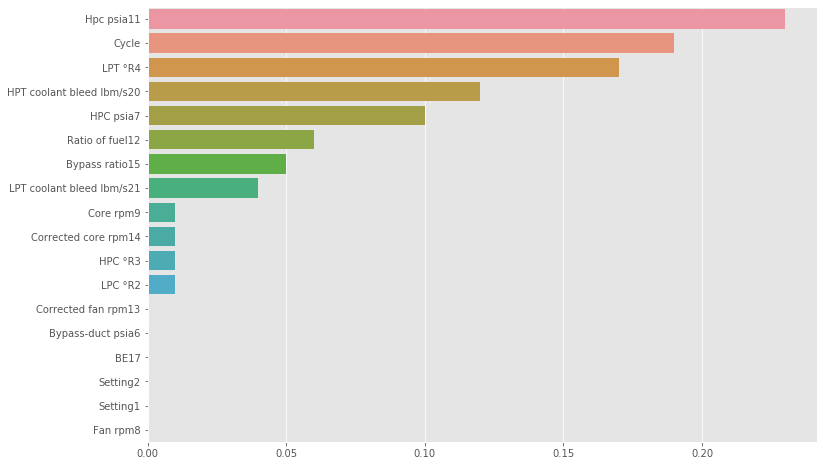

In [149]:
plt.figure(figsize = (12,8))
sns.barplot(x = feature_imp, y = feature_imp.index)

In [145]:
rf = pd.DataFrame({'Cycles':[56,106,136,156,176],
                  'Score':[92.8,99.6,95.4,63,100]})

Text(0, 0.5, 'Model Score')

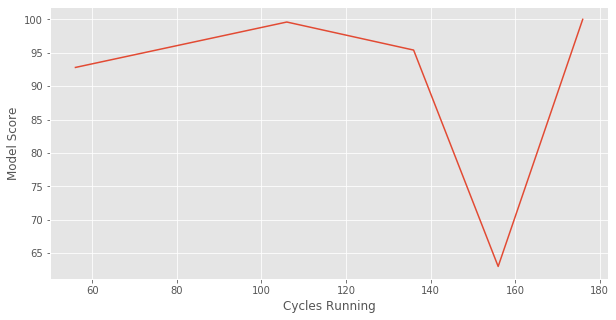

In [148]:
plt.figure(figsize=(10,5))
plt.plot(rf.Cycles,rf.Score)
plt.xlabel('Cycles Running')
plt.ylabel('Model Score')

## SVM Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
X50 = train_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1)
y50 = train_df['Class_50']
X_train, X_test, y_train, y_test = train_test_split(X50, y50, test_size = 0.2)
model = SVC()
model.fit(X_train, y_train)
print('Training score:',model.score(X_train,y_train))
print('Testing score:',model.score(X_test,y_test))

Training score: 0.7623000484730974
Testing score: 0.7632662951296341


In [ ]:
param_grid = {'C' : [0.1,1],
             'gamma': [1, 0.1],
             'kernel':['poly']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.1, gamma=1, kernel=poly .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [188]:
print(grid.best_estimator_) 

SVC(C=500, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [17]:
# 50 cycles before breakdown with C of 1
from sklearn import metrics
X_train_real50 = train_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1)
y_train_real50 = train_df['Class_50']
X_test_real50 = test_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1)
y_test_real50 = test_df['Class_50']
model = SVC(kernel = 'poly')
model.fit(X_train_real50, y_train_real50)
y_pred50 = model.predict(X_test_real50)
print('Training score:',model.score(X_train_real50,y_train_real50))
print('Testing score:',model.score(X_test_real50,y_test_real50))
print("testing data Accuracy:",metrics.accuracy_score(y_test_real50, y_pred50))

Training score: 0.7706848916678785
Testing score: 0.6445479535736103
testing data Accuracy: 0.6445479535736103


In [47]:
# 70 cycles before breakdown
X_train_real70 = train_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1)
y_train_real70 = train_df['Class_70']
X_test_real70 = test_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1)
y_test_real70 = test_df['Class_70']
model = SVC()
model.fit(X_train_real70, y_train_real70)
y_pred70 = model.predict(X_test_real70)
print('Training score:',model.score(X_train_real70,y_train_real70))
print('Testing score:',model.score(X_test_real70,y_test_real70))
print("testing data Accuracy:",metrics.accuracy_score(y_test_real70, y_pred70))

Training score: 0.710532693519461
Testing score: 0.5652871105681124
testing data Accuracy: 0.5652871105681124


In [48]:
# 100 cycles before breakdown
X_train_real100 = train_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1)
y_train_real100 = train_df['Class_100']
X_test_real100 = test_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1)
y_test_real100 = test_df['Class_100']
model = SVC()
model.fit(X_train_real100, y_train_real100)
y_pred100 = model.predict(X_test_real100)
print('Training score:',model.score(X_train_real100,y_train_real100))
print('Testing score:',model.score(X_test_real100,y_test_real100))
print("testing data Accuracy:",metrics.accuracy_score(y_test_real100, y_pred100))

Training score: 0.9647132955261499
Testing score: 0.9601405009163103
testing data Accuracy: 0.9601405009163103


In [58]:
# 150 cycles before breakdown
X_train_real150 = train_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1)
y_train_real150 = train_df['Class_150']
X_test_real150 = test_df.drop(['Unit', 'RUL','Class_50','Class_70','Class_100','Class_150'],axis = 1)
y_test_real150 = test_df['Class_150']
model = SVC(kernel = 'poly')
model.fit(X_train_real150, y_train_real150)
y_pred150 = model.predict(X_test_real150)
print('Training score:',model.score(X_train_real150,y_train_real150))
print('Testing score:',model.score(X_test_real150,y_test_real150))
print("testing data Accuracy:",metrics.accuracy_score(y_test_real150, y_pred150))

Training score: 0.9079540497309874
Testing score: 0.9476939523518632
testing data Accuracy: 0.9476939523518632


No handles with labels found to put in legend.


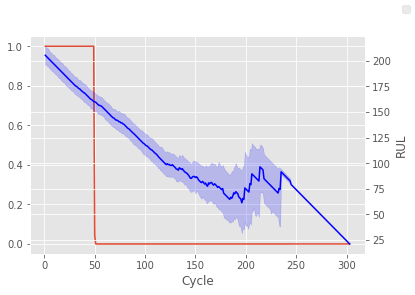

In [73]:
ax = sns.lineplot(test_df.Cycle, y_pred,legend = False)
ax2 = ax.twinx()
sns.lineplot(test_df.Cycle, test_df.RUL,ax = ax2, color = 'blue',legend = False)
# sns.lineplot(train_df.Cycle, train_df.RUL)
ax.figure.legend()

Text(0, 0.5, 'Model Score')

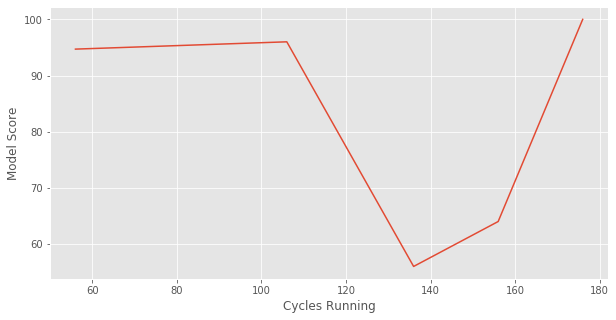

In [153]:
svm = pd.DataFrame({'Cycles':[56,106,136,156,176],
                  'Score':[94.7,96,56,64,100]})
plt.figure(figsize=(10,5))
plt.plot(svm.Cycles,svm.Score)
plt.xlabel('Cycles Running')
plt.ylabel('Model Score')

In [55]:
max_cycle_train = train_df.groupby('Unit')['Cycle'].max()
print(max_cycle_train)
print(max_cycle_train.mean())

Unit
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: Cycle, Length: 100, dtype: int64
206.31


<Figure size 864x576 with 0 Axes>

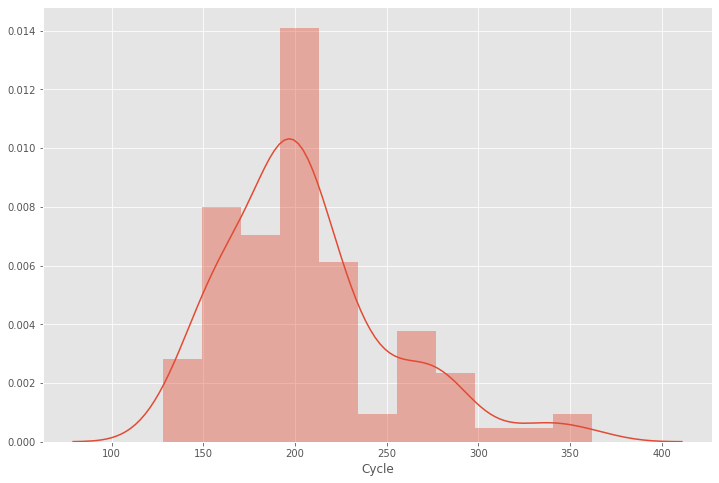

In [56]:
plt.figure(figsize = (12,8))
sns.distplot(max_cycle_train)

In [28]:
max_cycle_test = test_df.groupby('Unit')['Cycle'].max()
max_cycle_test

Unit
1       31
2       49
3      126
4      106
5       98
      ... 
96      97
97     134
98     121
99      97
100    198
Name: Cycle, Length: 100, dtype: int64

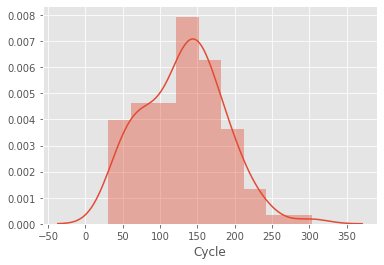

In [46]:
sns.distplot(max_cycle_test)

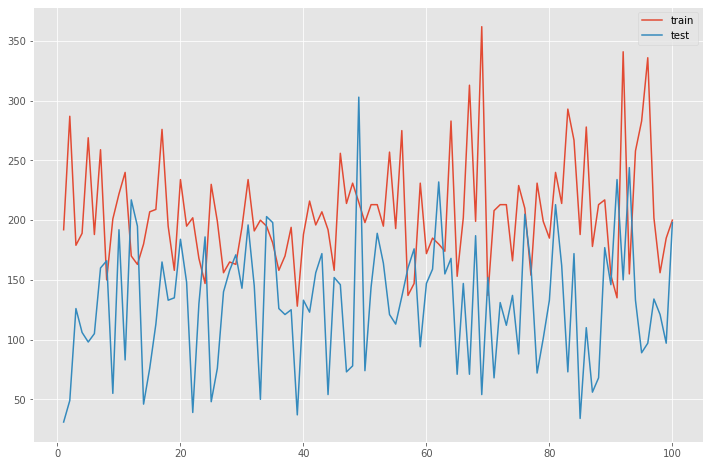

In [44]:
plt.figure(figsize = (12,8))
plt.plot(max_cycle_train,label = 'train')
plt.plot(max_cycle_test,label = 'test')
plt.legend()
